In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import numpy as np
from nltk.tokenize import word_tokenize
import nltk
import spacy
from IPython.display import clear_output

In [228]:
#df=pd.read_csv('https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv')
df=pd.read_csv('trump_tweets_of_interest.csv')
print(df.columns)

#filter=(df.hashtags.notnull()) & (df.hashtags!=None) & (df.hashtags.isin([
    #'MakeAmericaGreatAgain TRUMP',
#'DrainTheSwamp',
#'CrookedHiliary',
#'Debate2016',
#'WakeUpAmerica',
#'LieOfTheYear',
#'Israel',
#'Patriotic',
#'Snowden',
#'G7 NATO',
#'AfghanStrategy',
#'USA Japan',
#'AmericaFirst FamilyFirst',
#'CrookedHillary BigLeagueTruth DrainTheSwamp'
#]))
#df=df[filter]

#f.to_csv('trump_tweets_of_interest.csv')

#sns.countplot(x='hashtags', data=df)



Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'status_id',
       'created_at', 'user_id', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_create

In [238]:
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
p = re.compile(TOKENS_ALPHANUMERIC)
#nlp = spacy.load('en_core_web_sm')

search_list=[
'clinton',
'korea',
'isis',
'israel',
'obama',
'health',
'snowden',
'hillary',
'crooked',
'RADICAL',
'WikiLeaks',
'corruption',
'biden',
'families',
'family',
'economic',
'Mexico',
'Wall',
'education',
'epa',
'insurance',
'medicare',
'parenthood',
'refugees',
'exploration',
'justices',
'military',
'terrorist',
'afghanistan',
'iran',
'generals',
'veterns',
'china',
'jobs',
'trade',
'taxes',
'debt',
'dodd-frank',
'manufacturing',
'steel',
'auto',
'miniumum',
'relief',
'corporate',
'budget',
'regulation'
'immigration'
'cybersecurity',
'energy',
'abortion',
'guns',
'WakeUpAmerica',
'japan',
'LieOfTheYear',
'oil',
'pipeline'
   
#'book'
]
word_list=[]
stop_words=['nan','tinyurl','http','com','cont','t','co','https']
exclude_found=['hotroddergirl','vote','MATTER','BonnieKit','purpleheartwife'
    'Foshay504','scorpio5053'
]
df['sentiment_polarity']=0
df['sentiment_subjectivity']=0
df['sentence']=np.nan
df['found_flag']=0
clear_output(wait=True)
for key,item in df[['text','hashtags','retweet_text']].iterrows():
    #word_list=nltk.word_tokenize(item.text.replace("'s "," is "))
    str_buffer=item.text.replace("'s "," is ")
    str_buffer=str_buffer.replace("n't"," not ")
    str_buffer=str_buffer.replace(" didn't"," did not ")
    str_buffer=str_buffer.replace("I'm"," i am ")
    str_buffer=str_buffer.replace(" they're "," they are")
    str_buffer = re.sub(r'[^\w\s]', ' ', str_buffer) 
    word_list=p.findall(str_buffer)

    for word in list(word_list):  # iterating on a copy since removing will mess things up
        if word in stop_words:
            word_list.remove(word)
        
    sentence=' '.join(word_list)
    for word in word_list:
        if word in search_list:
            if word not in exclude_found:
                df.loc[key,'found_flag']=1
                #print(sentence+'\n\n')
            break
            

    #doc=nlp(sentence)
    #tokens=[str(token).replace("\'s","is") for token in doc]
    #lemmas =[token.lemma_ for token in doc]
    #print(lemmas)

    my_valance=TextBlob(sentence)
    df.loc[key,'sentence']=sentence
    df.loc[key,'sentiment_polarity']=my_valance.sentiment.polarity
    df.loc[key,'sentiment_subjectivity']=my_valance.sentiment.subjectivity
    #print(sentence,item.hashtags)

pd.options.display.max_colwidth = 100
print("Sentiment Polarity above .5 is positive and subjectivity above .5 is probably not public and not factual\n\n")
filter=df['found_flag']==1
filter=filter & ((df['sentiment_polarity']<0.2) & (df['sentiment_polarity']>0)) | (df['sentiment_polarity']>0.8)

for key,item in df[filter][['hashtags','text','sentence','sentiment_polarity','sentiment_subjectivity']].iterrows():
    print("{} {} {} {}\n".format(item.hashtags,item.sentence,item.sentiment_polarity,item.sentiment_subjectivity))
    

df=df[filter]    



Sentiment Polarity above .5 is positive and subjectivity above .5 is probably not public and not factual


nan Tonight I trade places with Larry King kingsthings and interview him on the 25th anniversary of his show 9PM on CNN featuring best clips 1.0 0.3

nan The Keystone pipeline will create 20 000 jobs and lower gas prices But Obama says No Dumb 0.1875 0.5

nan The safest way to preserve Medicare is with a robust and vibrant economy We should lower corporate and capital gain taxes immediately 0.08333333333333333 0.16666666666666666

TimeToGetTough The thing about high corporate tax rates is that in the end companies aren the ones who foot the bill consumers do 0.08 0.26999999999999996

nan Third quarter GDP was lowered to 2 There wo not be any economic recovery until BarackObama is defeated 0.1 0.1

nan The new job figures do not include 315 000 people who have given up looking for jobs 0.13636363636363635 0.45454545454545453

nan The Super Committee is finding ways to raise all our

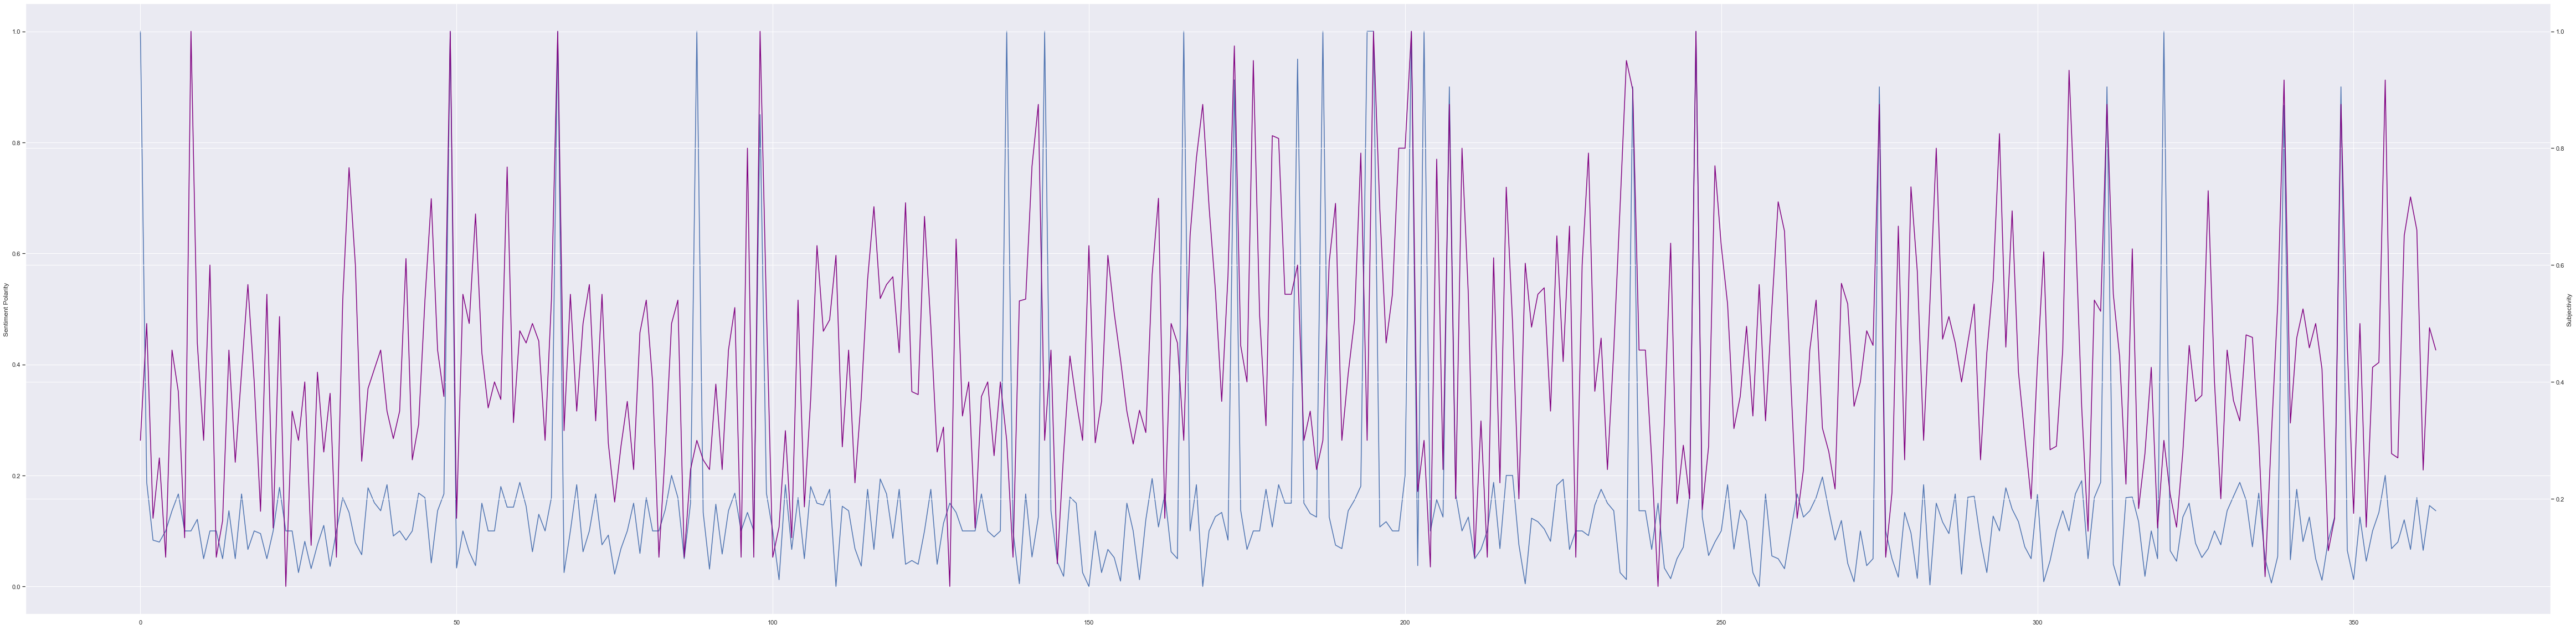

In [203]:
#df.to_csv('trump_tweets_of_interest.csv')
sns.set(rc={'figure.figsize':(81.7,20.27)})
x=np.arange(len(df))
y=df['sentiment_polarity']
fig, ax= plt.subplots()
ax.plot(x,y)
plt.ylabel('Sentiment Polarity')
ax2=ax.twinx()
y=df['sentiment_subjectivity']
ax2.plot(x,y,color='purple')
ax2.set_ylabel('Subjectivity')
plt.show()

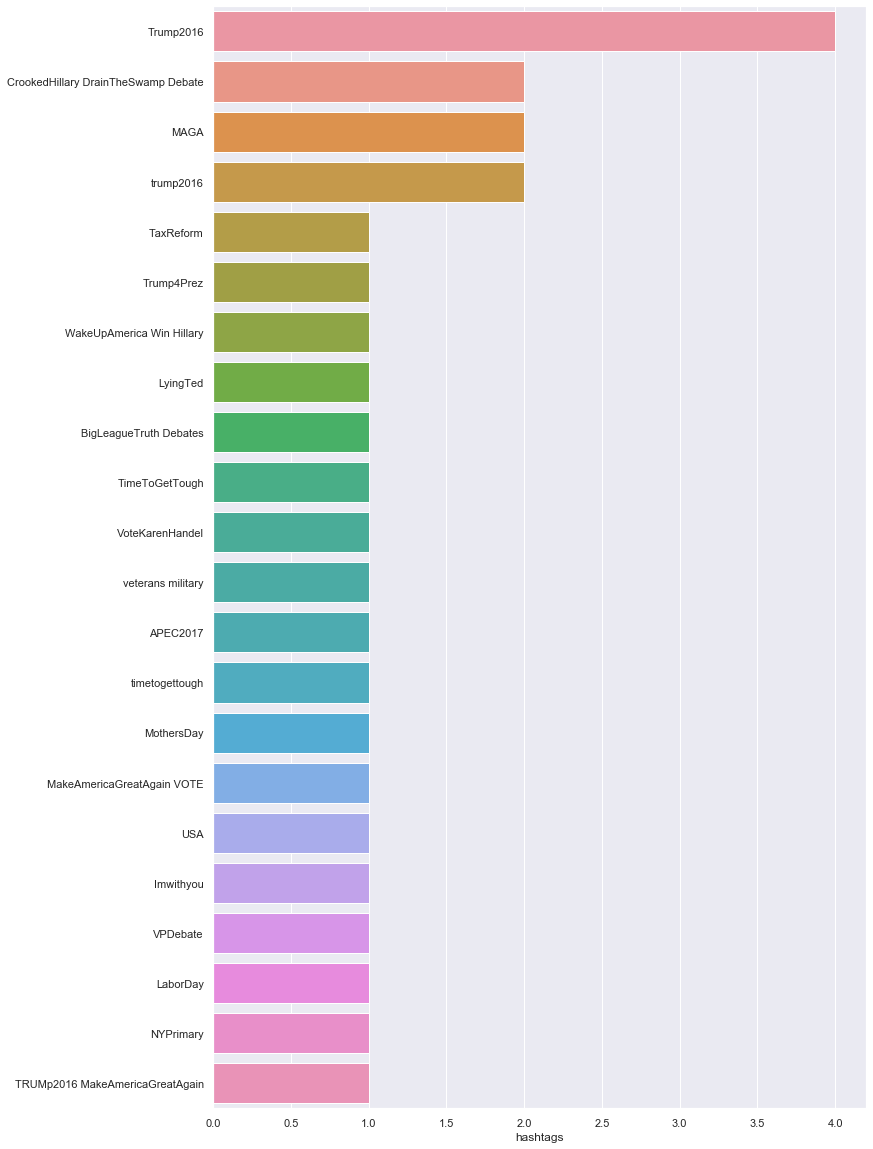

In [197]:
sns.set(rc={'figure.figsize':(11.7,20.27)})
sns.barplot(y=df.hashtags.value_counts().index, x=df.hashtags.value_counts())
    
LABELS=['hashtags']
